# LSTM Model


**We will be applying a LSTM model over our training data and evaluating its classification accuracy.**


**Load Libraries**

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
import pickle
import matplotlib.pyplot as plt


**Load Data**


In [2]:

with open("input/train.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

with open("input/matrix.pkl", "rb") as f:
    embedding_matrix, embedding_dimensions, vocab_length = pickle.load(f)
    

 

**Set Dynamic Learning Rate. We'll reduce learning rate if validation loss has stopped improving.**


In [3]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)


**We'll stop training once validation loss has stopped improving.**


In [4]:

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='auto')



**Create LTSM model and fit model over training data**


In [5]:
# Create LSTM Model 
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_length, embedding_dimensions, trainable= False, weights=[embedding_matrix]))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,117,377
Trainable params: 117,377
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [6]:
# Fit Model over Data
num_epochs = 20
batch_size = 256
model = lstm_model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs=num_epochs, batch_size=batch_size, callbacks=([reduce_lr,early_stopping]) )


Train on 31428 samples, validate on 13470 samples
Epoch 1/20
31428/31428 [==============================] - 286s 9ms/sample - loss: 0.2754 - acc: 0.8944 - val_loss: 0.1589 - val_acc: 0.9474
Epoch 2/20
31428/31428 [==============================] - 317s 10ms/sample - loss: 0.1391 - acc: 0.9475 - val_loss: 0.1489 - val_acc: 0.9334
Epoch 3/20
31428/31428 [==============================] - 336s 11ms/sample - loss: 0.1288 - acc: 0.9508 - val_loss: 0.3052 - val_acc: 0.8436
Epoch 4/20
31428/31428 [==============================] - 344s 11ms/sample - loss: 0.1683 - acc: 0.9353 - val_loss: 0.3437 - val_acc: 0.8451
Epoch 5/20
31428/31428 [==============================] - 354s 11ms/sample - loss: 0.2231 - acc: 0.9120 - val_loss: 0.1443 - val_acc: 0.9461
Epoch 6/20
31428/31428 [==============================] - 362s 12ms/sample - loss: 0.2175 - acc: 0.9083 - val_loss: 0.1319 - val_acc: 0.9478
Epoch 7/20
31428/31428 [==============================] - 374s 12ms/sample - loss: 0.1199 - acc: 0.9590 -

**Evaluate Model Accuracy**


**Plot Accuracy & Loss Graphs**


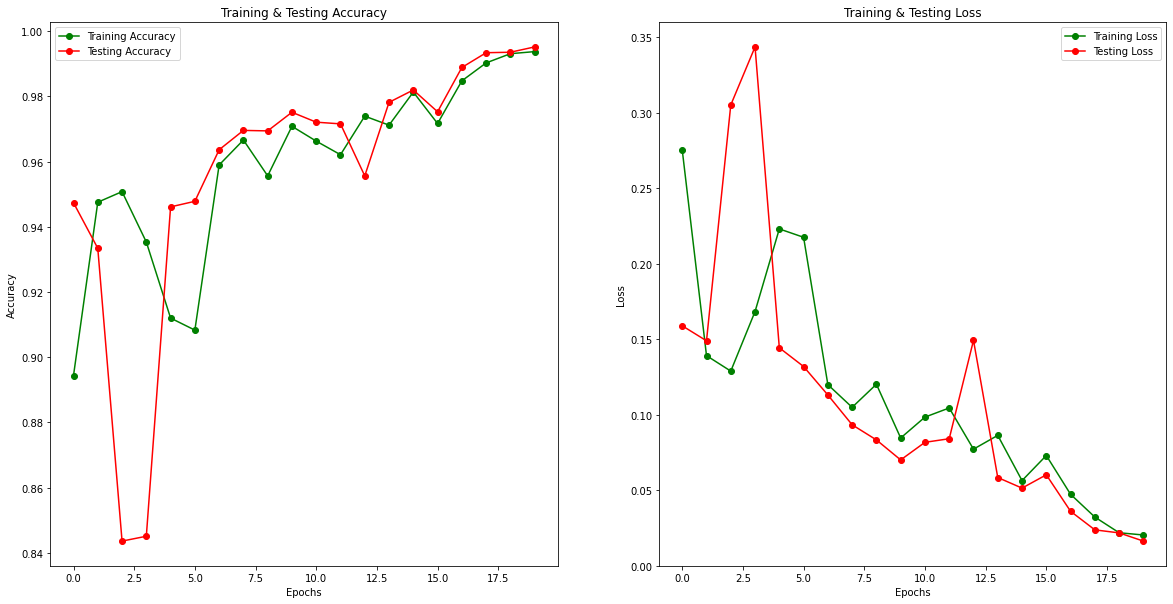

In [7]:

epochs = [i for i in range(num_epochs)]
fig, ax = plt.subplots(1,2)
training_accuracy = model.history['acc']
training_loss = model.history['loss']
validation_accuracy = model.history['val_acc']
validation_loss = model.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs, training_accuracy, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, validation_accuracy, 'ro-', label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs, training_loss, 'go-', label = 'Training Loss')
ax[1].plot(epochs, validation_loss, 'ro-', label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()


**Output Model's Accuracy Results**


**Train & Test Accuracy Results**

In [8]:
train_results = lstm_model.evaluate(X_train,y_train, verbose=0, batch_size=batch_size)
test_results = lstm_model.evaluate(X_test,y_test, verbose=0, batch_size=batch_size)
print("Train Accuracy: {}".format(train_results[1]*100))
print("Test Accuracy: {}".format(test_results[1]*100))


Train Accuracy: 99.59908127784729
Test Accuracy: 99.51744675636292


**Model's Absolute Accuracy**


In [94]:

predictions = lstm_model.predict_classes(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_test,predictions)*100,2)))


Accuracy: 99.52


**Confusion Matrix**


In [95]:
conf_matrix = confusion_matrix(y_test,predictions)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", classification_report(y_test,predictions))


Confusion Matrix: 
 [[7032   37]
 [  28 6373]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      7069
           1       0.99      1.00      0.99      6401

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



**Save Model**


In [96]:
MODEL_DIR = "./saved_models/LSTM/LSTM_Model.hdf5"
print(MODEL_DIR)
tf.keras.models.save_model(lstm_model,MODEL_DIR,overwrite=True)


./saved_models/LSTM/LSTM_Model.hdf5
